In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Podaj ścieżkę do pliku CSV
file_path = "ela_rgb.csv"

# Wczytaj plik CSV do DataFrame
df = pd.read_csv(file_path)

# Wyświetl pierwsze 5 wierszy DataFrame
df.head()

,AUC,Precision,Recall,TN,TP,accuracy,loss,val_AUC,val_Precision,val_Recall,val_TN,val_TP,val_accuracy,val_loss
0,0.759413,0.665026,0.547612,4043.0,1892.0,0.702284,0.576237,0.819237,0.683145,0.687650,1963.0,1147.0,0.747057,0.513310
1,0.791927,0.678258,0.671780,3895.0,2321.0,0.735534,0.543856,0.817705,0.698496,0.640288,2034.0,1068.0,0.745136,0.513962
2,0.814418,0.699373,0.709696,3942.0,2452.0,0.756597,0.517178,0.837182,0.715854,0.703837,2029.0,1174.0,0.769397,0.484389
3,0.817709,0.696188,0.703039,3936.0,2429.0,0.753165,0.514788,0.829506,0.613940,0.881894,1570.0,1471.0,0.730483,0.536661
4,0.836777,0.720588,0.751664,3989.0,2597.0,0.779316,0.487873,0.858865,0.702149,0.842326,1899.0,1405.0,0.793658,0.460762


In [3]:
max_values = df.max()
max_values

AUC                 0.965396
Precision           0.840398
Recall              0.934588
TN               4386.000000
TP               3229.000000
accuracy            0.899065
loss                0.576237
val_AUC             0.926181
val_Precision       0.819026
val_Recall          0.960432
val_TN           2216.000000
val_TP           1602.000000
val_accuracy        0.872448
val_loss            0.539760
dtype: float64

In [4]:
min = df['val_loss'].idxmin()
df.loc[min]

AUC                 0.942442
Precision           0.804828
Recall              0.916643
TN               4228.000000
TP               3167.000000
accuracy            0.875044
loss                0.291150
val_AUC             0.912882
val_Precision       0.782815
val_Recall          0.890288
val_TN           2083.000000
val_TP           1485.000000
val_accuracy        0.857074
val_loss            0.347563
Name: 14, dtype: float64

In [5]:
df.columns = [
    'auc_trening', 'Precyzja Trening', 'Czułość Trening',
    'tn_trening', 'tp_trening', 'Dokładność Trening', 'Strata Trening',
    'auc_test', 'Precyzja Test', 'Czułość Test',
    'tn_test', 'tp_test', 'Dokładność Test', 'Strata Test'
]
df.head()

,auc_trening,Precyzja Trening,Czułość Trening,tn_trening,tp_trening,Dokładność Trening,Strata Trening,auc_test,Precyzja Test,Czułość Test,tn_test,tp_test,Dokładność Test,Strata Test
0,0.759413,0.665026,0.547612,4043.0,1892.0,0.702284,0.576237,0.819237,0.683145,0.687650,1963.0,1147.0,0.747057,0.513310
1,0.791927,0.678258,0.671780,3895.0,2321.0,0.735534,0.543856,0.817705,0.698496,0.640288,2034.0,1068.0,0.745136,0.513962
2,0.814418,0.699373,0.709696,3942.0,2452.0,0.756597,0.517178,0.837182,0.715854,0.703837,2029.0,1174.0,0.769397,0.484389
3,0.817709,0.696188,0.703039,3936.0,2429.0,0.753165,0.514788,0.829506,0.613940,0.881894,1570.0,1471.0,0.730483,0.536661
4,0.836777,0.720588,0.751664,3989.0,2597.0,0.779316,0.487873,0.858865,0.702149,0.842326,1899.0,1405.0,0.793658,0.460762


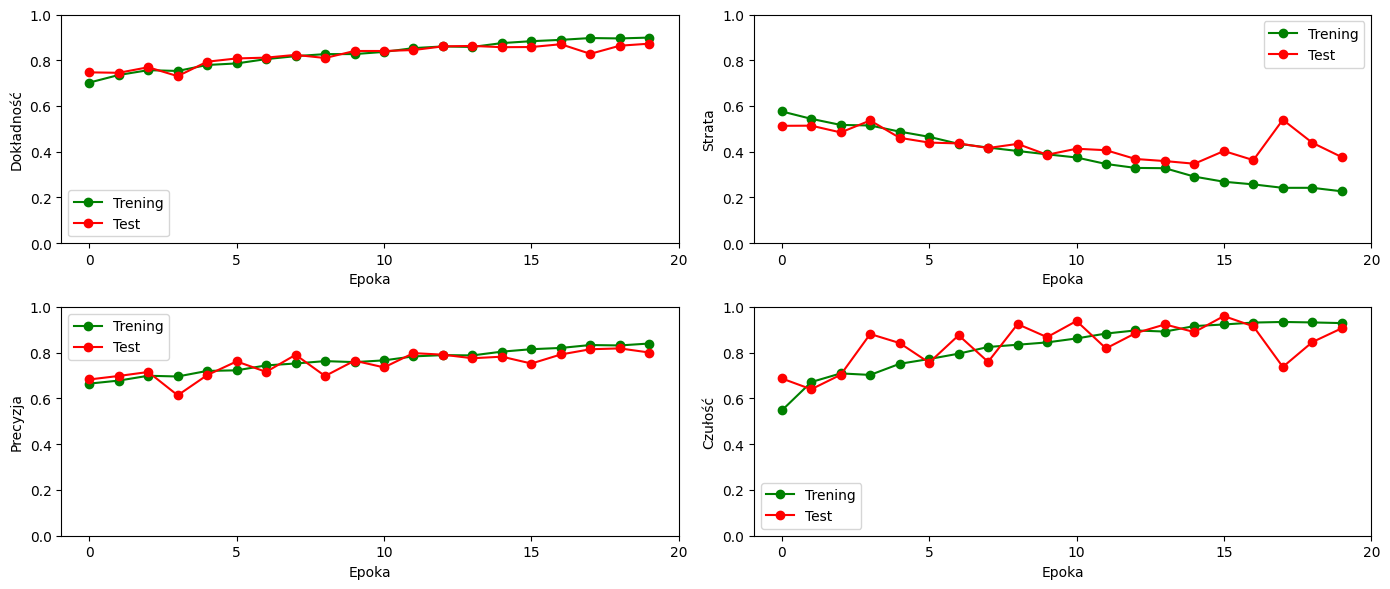

In [9]:
fig, axes = plt.subplots(2, 2, figsize=(14, 6))

# Ustawienia osi x
x_ticks = [0, 5, 10, 15, 20]

# Wykres dla Dokładności
axes[0, 0].plot(df['Dokładność Trening'], label='Trening', color='green', marker='o')
axes[0, 0].plot(df['Dokładność Test'], label='Test', color='red', marker='o')
axes[0, 0].set_xlabel('Epoka')
axes[0, 0].set_ylabel('Dokładność')
axes[0, 0].set_ylim(0, 1)
axes[0, 0].set_xticks(x_ticks)
axes[0, 0].legend()

# Wykres dla Straty
axes[0, 1].plot(df['Strata Trening'], label='Trening', color='green', marker='o')
axes[0, 1].plot(df['Strata Test'], label='Test', color='red', marker='o')
axes[0, 1].set_xlabel('Epoka')
axes[0, 1].set_ylabel('Strata')
axes[0, 1].set_ylim(0, 1)
axes[0, 1].set_xticks(x_ticks)
axes[0, 1].legend()

# Wykres dla Precyzji
axes[1, 0].plot(df['Precyzja Trening'], label='Trening', color='green', marker='o')
axes[1, 0].plot(df['Precyzja Test'], label='Test', color='red', marker='o')
axes[1, 0].set_xlabel('Epoka')
axes[1, 0].set_ylabel('Precyzja')
axes[1, 0].set_ylim(0, 1)
axes[1, 0].set_xticks(x_ticks)
axes[1, 0].legend()

# Wykres dla Czułości
axes[1, 1].plot(df['Czułość Trening'], label='Trening', color='green', marker='o')
axes[1, 1].plot(df['Czułość Test'], label='Test', color='red', marker='o')
axes[1, 1].set_xlabel('Epoka')
axes[1, 1].set_ylabel('Czułość')
axes[1, 1].set_ylim(0, 1)
axes[1, 1].set_xticks(x_ticks)
axes[1, 1].legend()

# Zapis do pliku SVG
plt.tight_layout()
plt.savefig('training_ela_rgb.svg', format='svg')
plt.show()
